下載鐵達尼號旅客資料集

In [1]:
import urllib.request
import os

In [2]:
url='http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.xls'
filepath='data/titanic3.xls'
if not os.path.isfile(filepath):
    result=urllib.request.urlretrieve(url,filepath)
    print('download:',result)

資料預處理

In [3]:
import numpy as np
import pandas as pd
from sklearn import preprocessing

In [4]:
all_df=pd.read_excel(filepath)

In [5]:
col=['survived','name','pclass','sex','age','sibsp','parch','fare','embarked']
all_df=all_df[col]

In [6]:
msk=np.random.rand(len(all_df))<0.8
train_df=all_df[msk]
test_df=all_df[~msk]
train_df

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,1,"Allen, Miss. Elisabeth Walton",1,female,29.0000,0,0,211.3375,S
1,1,"Allison, Master. Hudson Trevor",1,male,0.9167,1,2,151.5500,S
2,0,"Allison, Miss. Helen Loraine",1,female,2.0000,1,2,151.5500,S
3,0,"Allison, Mr. Hudson Joshua Creighton",1,male,30.0000,1,2,151.5500,S
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0000,1,2,151.5500,S
...,...,...,...,...,...,...,...,...,...
1304,0,"Zabour, Miss. Hileni",3,female,14.5000,1,0,14.4542,C
1305,0,"Zabour, Miss. Thamine",3,female,NaN,1,0,14.4542,C
1306,0,"Zakarian, Mr. Mapriededer",3,male,26.5000,0,0,7.2250,C
1307,0,"Zakarian, Mr. Ortin",3,male,27.0000,0,0,7.2250,C


In [7]:
def preprocess(raw_data):
    df=raw_data.drop(['name'],axis=1)
    age_mean=df['age'].mean()
    df['age']=df['age'].fillna(age_mean)
    fare_mean=df['fare'].mean()
    df['fare']=df['fare'].fillna(fare_mean)
    df['sex']=df['sex'].map({'female':0, 'male':1}).astype(int)
    onehot_df=pd.get_dummies(data=df, columns=['embarked'])
    
    ndarray=onehot_df.values
    features=ndarray[:,1:]
    label=ndarray[:,0]
    
    minimax_scale=preprocessing.MinMaxScaler(feature_range=(0,1))
    features_normalize=minimax_scale.fit_transform(features)
    
    return features_normalize,label

In [8]:
train_features, train_label=preprocess(train_df)
test_features, test_label=preprocess(test_df)

In [9]:
train_features

array([[0.        , 0.        , 0.36116884, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 1.        , 0.00939458, ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.0229641 , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [1.        , 1.        , 0.32985358, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.33611663, ..., 1.        , 0.        ,
        0.        ],
       [1.        , 1.        , 0.36116884, ..., 0.        , 0.        ,
        1.        ]])

建立模型

In [10]:
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [11]:
model=Sequential()
model.add(Dense(input_dim=9,kernel_initializer='uniform',units=40,activation='relu'))
model.add(Dense(kernel_initializer='uniform',units=30,activation='relu'))
model.add(Dense(units=1,kernel_initializer='uniform',activation='sigmoid'))

訓練模型

In [12]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
train_history=model.fit(train_features,train_label,validation_split=0.1,epochs=30,batch_size=30,verbose=2)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 927 samples, validate on 104 samples
Epoch 1/30





 - 1s - loss: 0.6895 - acc: 0.5944 - val_loss: 0.6748 - val_acc: 0.7596
Epoch 2/30
 - 0s - loss: 0.6660 - acc: 0.6117 - val_loss: 0.6046 - val_acc: 0.7596
Epoch 3/30
 - 0s - loss: 0.6011 - acc: 0.6926 - val_loss: 0.5040 - val_acc: 0.7692
Epoch 4/30
 - 0s - loss: 0.5336 - acc: 0.7724 - val_loss: 0.4732 - val_acc: 0.7788
Epoch 5/30
 - 0s - loss: 0.4997 - acc: 0.7832 - val_loss: 0.4754 - val_acc: 0.7981
Epoch 6/30
 - 0s - loss: 0.4818 - acc: 0.7789 - val_loss: 0.4645 - val_acc: 0.7981
Epoch 7/30
 - 0s - loss: 0.4747 - acc: 0.7810 - val_loss: 0.4613 - val_acc: 0.7981
Epoch 8/30
 - 0s - loss: 0.4691 - acc: 0.7821 - val_loss: 0.4579 - val_acc: 0.7981
Epoch 9/30
 - 0s - loss: 0.4665 - acc: 0.7832 - val_loss: 0.4569 - val_acc: 0.7981
Epoch 10/30
 - 0s - loss: 0.4714 - acc: 0.7789 - val_loss: 0.4539 - val_acc: 0.8173
Epoch 11/30
 - 0s -

In [13]:
import matplotlib.pyplot as plt
def show_history(train_history,acc,val_acc):
    plt.plot(train_history.history[acc])
    plt.plot(train_history.history[val_acc])
    plt.title('train history')
    plt.xlabel('epochs')
    plt.ylabel(acc)
    plt.legend(['train','test'], loc='upper left')
    plt.show()

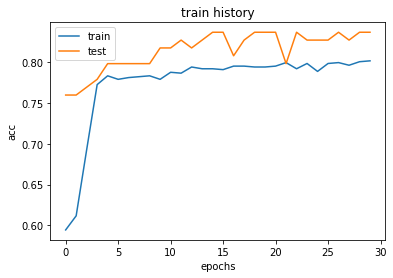

In [14]:
show_history(train_history,'acc','val_acc')

In [15]:
scores=model.evaluate(test_features,test_label)
scores

278/278 [==============================] - 0s 50us/step


[0.45572842453881135, 0.7985611519367575]

In [16]:
prediction=model.predict_classes(test_features)
prediction

array([[1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
    

加入JACK&ROSE

In [17]:
add_data=[{'survived':0, 'name':'Jack','pclass':3, 'sex':'male', 
        'age':23, 'sibsp':1,'parch':0, 'fare':5.0000,'embarked':'S'},
          {'survived':1, 'name':'Rose','pclass':1, 'sex':'female', 
        'age':20, 'sibsp':1,'parch':0, 'fare':100.0000,'embarked':'S'}]
jr_df=pd.DataFrame(add_data)
jr_df

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
0,0,Jack,3,male,23,1,0,5.0,S
1,1,Rose,1,female,20,1,0,100.0,S


In [18]:
all_df=pd.concat([all_df,jr_df])
all_df[2:]

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked
2,0,"Allison, Miss. Helen Loraine",1,female,2.0,1,2,151.5500,S
3,0,"Allison, Mr. Hudson Joshua Creighton",1,male,30.0,1,2,151.5500,S
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0,1,2,151.5500,S
5,1,"Anderson, Mr. Harry",1,male,48.0,0,0,26.5500,S
6,1,"Andrews, Miss. Kornelia Theodosia",1,female,63.0,1,0,77.9583,S
...,...,...,...,...,...,...,...,...,...
1306,0,"Zakarian, Mr. Mapriededer",3,male,26.5,0,0,7.2250,C
1307,0,"Zakarian, Mr. Ortin",3,male,27.0,0,0,7.2250,C
1308,0,"Zimmerman, Mr. Leo",3,male,29.0,0,0,7.8750,S
0,0,Jack,3,male,23.0,1,0,5.0000,S


進行預測

In [19]:
all_features,all_label=preprocess(all_df)
all_probability=model.predict(all_features)
all_probability

array([[0.977306  ],
       [0.5474653 ],
       [0.97205174],
       ...,
       [0.1307141 ],
       [0.12859276],
       [0.97108036]], dtype=float32)

In [20]:
pd=all_df
pd.insert(len(all_df.columns),'probability',all_probability)
pd

,survived,name,pclass,sex,age,sibsp,parch,fare,embarked,probability
0,1,"Allen, Miss. Elisabeth Walton",1,female,29.0000,0,0,211.3375,S,0.977306
1,1,"Allison, Master. Hudson Trevor",1,male,0.9167,1,2,151.5500,S,0.547465
2,0,"Allison, Miss. Helen Loraine",1,female,2.0000,1,2,151.5500,S,0.972052
3,0,"Allison, Mr. Hudson Joshua Creighton",1,male,30.0000,1,2,151.5500,S,0.360501
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",1,female,25.0000,1,2,151.5500,S,0.969593
...,...,...,...,...,...,...,...,...,...,...
1306,0,"Zakarian, Mr. Mapriededer",3,male,26.5000,0,0,7.2250,C,0.176488
1307,0,"Zakarian, Mr. Ortin",3,male,27.0000,0,0,7.2250,C,0.174877
1308,0,"Zimmerman, Mr. Leo",3,male,29.0000,0,0,7.8750,S,0.130714
0,0,Jack,3,male,23.0000,1,0,5.0000,S,0.128593
